
Hello visitors, welcome again to my chain of notebooks on my learning process of Artificial Intelligence course by Professor Nguyen Truong Thinh.
In this notebook, I am working on the topic of USA housing prices based on many numeric attributes such as Avg. Income, House Age, Number of Rooms, etc.\
**Dataset link:** https://www.kaggle.com/datasets/aariyan101/usa-housingcsv

In [2]:
# Import libraries
import pandas as pd               # Pandas for Dataframe processing
import numpy as np                # Numpy for matrix computations
import matplotlib.pyplot as plt   # Matplot for visualizing data
import seaborn as sns             # Seaborn for the machine learning - oriented visualization
from sklearn import linear_model  # Scikit-learn Linear Regression

In [3]:
# Read data from file
file_path = '/content/USA_Housing.csv'
housing_dataframe = pd.read_csv(file_path)   # Read .csv from file path

# Using .head() for review some first data
housing_dataframe.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# Data Information
housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**SECTION 01: THE INSIGHTS OF DATA**

**COMMENT 1:**\
As we can see in our dataset contains not only the numeric categories but also the text, which need to be popped out before getting in depth with data

In [5]:
# Rid off the Address category
housing_notext = housing_dataframe.drop(['Address'], axis = 1)
housing_notext.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


Let's look at the correlation first!

<Axes: >

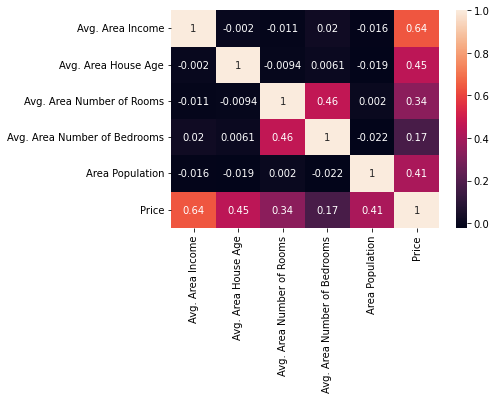

In [6]:
# Let's look at data correlation
correlation = housing_notext.corr()
sns.heatmap(correlation, annot = True)

As shown, there are some significant correlations here, which are 0.41, 0.45, 0.46, and 0.64. They are close to or even higher than 0.5

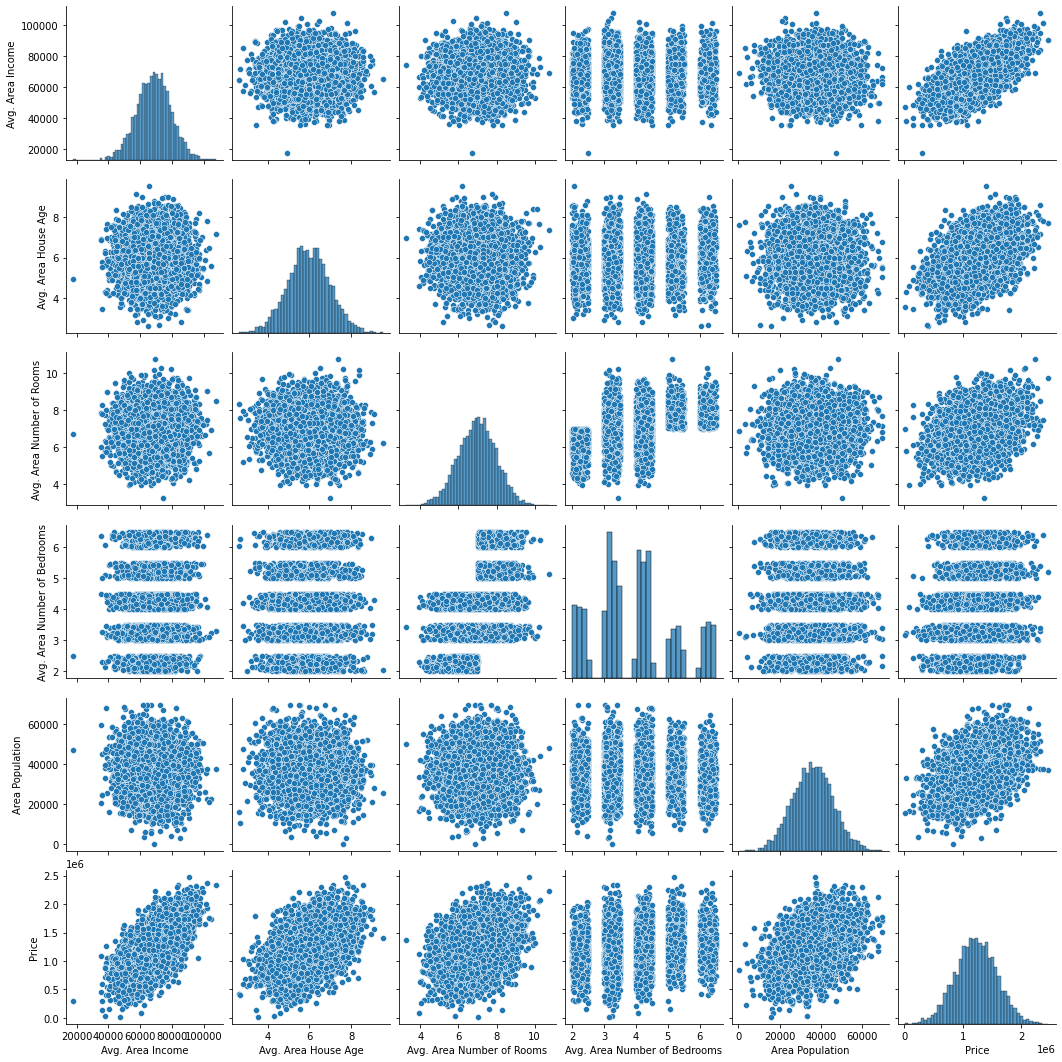

In [7]:
# Let's look at pair plots for more details
sns.pairplot(housing_notext)

We can see that the pair having the intercept of 0.64 gets a quite strong linearity between two categories

Text(0, 0.5, 'Number of Instances')

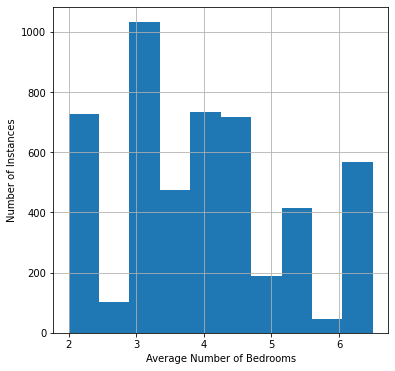

In [8]:
# Histograms
plt.figure(figsize = (6, 6))
housing_notext['Avg. Area Number of Bedrooms'].hist()
plt.xlabel('Average Number of Bedrooms')
plt.ylabel('Number of Instances')

Text(0, 0.5, 'Number of Instances')

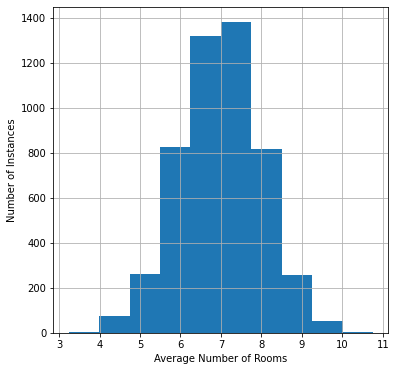

In [9]:
plt.figure(figsize = (6, 6))
housing_notext['Avg. Area Number of Rooms'].hist()
plt.xlabel('Average Number of Rooms')
plt.ylabel('Number of Instances')

Text(0, 0.5, 'Number of Instances')

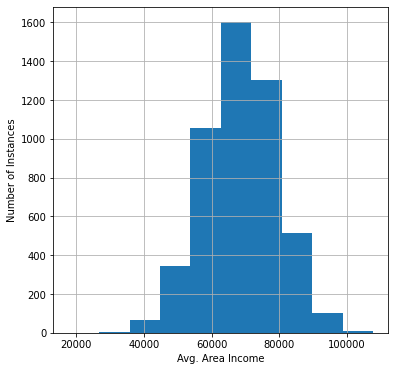

In [10]:
plt.figure(figsize = (6, 6))
housing_notext['Avg. Area Income'].hist()
plt.xlabel('Avg. Area Income')
plt.ylabel('Number of Instances')

In [11]:
# Let's make a model that predicts the price based on 5 categories
x_set = pd.DataFrame(housing_notext.drop(['Price'], axis=True)).T
y_set = pd.DataFrame(housing_notext['Price'])

**SECTION 02: TRAIN A MODEL WITH STANDARD SCALING DATA**

**COMMENT 2:**\
The average values of income, population should be rescaled since their larger values would cause the learning to slow down

In [12]:
# Import tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
std_scaler = StandardScaler()

# Rescale the value of Income and Price
scaled_income = pd.DataFrame(housing_notext.drop(['Price',                                       # Only scale the income and population                                    
                                                  'Area Population',
                                                  'Avg. Area House Age',     
                                                  'Avg. Area Number of Rooms',	
                                                  'Avg. Area Number of Bedrooms'], axis = True))
scaled_population = pd.DataFrame(housing_notext.drop(['Price',                                                    
                                                      'Avg. Area Income',
                                                      'Avg. Area House Age',     
                                                      'Avg. Area Number of Rooms',	
                                                      'Avg. Area Number of Bedrooms'], axis = True))

# Using standard scaling method
scaled_income     = pd.DataFrame(std_scaler.fit_transform(scaled_income))
scaled_population = pd.DataFrame(std_scaler.fit_transform(scaled_population))

# REMEMBER: Rename the columns before going on
x_scaleset  = pd.DataFrame([housing_notext['Avg. Area House Age'], 
                          housing_notext['Avg. Area Number of Rooms'], 	
                          housing_notext['Avg. Area Number of Bedrooms']]).T          # REMEMBER: Tranposing makes them from (3,5000) to (5000,3), which is needed
x_scaleset.insert(loc=0, column="Scaled Avg. Income", value=scaled_income)            # Add into the main set with the scaled income & population
x_scaleset.insert(loc=1, column="Scaled Area Population", value=scaled_population)

In [13]:
# Let's have a look at scaled set
x_scaleset.head()

,Scaled Avg. Income,Scaled Area Population,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms
0,1.028660,-1.317599,5.682861,7.009188,4.09
1,1.000808,0.403999,6.002900,6.730821,3.09
2,-0.684629,0.072410,5.865890,8.512727,5.13
3,-0.491499,-0.186734,7.188236,5.586729,3.26
4,-0.807073,-0.988387,5.040555,7.839388,4.23


**COMMENT 3: BRIEF VIEW OF MODEL**\
As mentioned, we are gonna create a model that based on 5 categories, so their 1st order linear form must be:\
Price = (Theta1*  Scaled Avg. Income) + (Theta2* Scaled Area Population) + (Theta3* Avg. Area House Age) + (Theta4* Avg. Area Number of Rooms) + (Theta5* Avg. Area Number of Bedrooms) + Bias

In [14]:
# Before going deeper in the training process, the raw set of data must be separated - The ratio of 80:20
x_train, x_test, y_train, y_test = train_test_split(x_scaleset, y_set, test_size=0.2, random_state = 0)

In [15]:
# Dataset dimension
print("Training set:", x_train.shape)
print("Test set:", x_test.shape)

Training set: (4000, 5)
Test set: (1000, 5)


In [16]:
# This time, a linear model with 1st order attributes is considered
housing_linear = linear_model.LinearRegression()
housing_linear.fit(x_train, y_train)

LinearRegression()

In [17]:
# Evaluation on training and test sets
train_score = housing_linear.score(x_train, y_train)
test_score = housing_linear.score(x_test, y_test)

# Display results
print("The training score:", train_score)
print("The test score:", test_score)

The training score: 0.918840114090963
The test score: 0.9146454505138086


**COMMENT 5:**\
Surprisingly, both evaluation scores of the training set and test set are realy high, and quite close together.\
We may use plots to visualize our model predictions , however, the highest possible number of variables is 3 (3D plots), thus, there are 2 attributes for each axis of the x, y in 3D plot.

In [18]:
# Let's have a look at the thetas
print("Model Coefficient:")
print(housing_linear.coef_.reshape(5, 1))

Model Coefficient:
[[230833.35479062]
 [151707.17771801]
 [165809.65114949]
 [120329.4078772 ]
 [  2193.09557863]]


In [19]:
# Let's have a look at the bias (intercept)
print("Model Intercept:")
print(housing_linear.intercept_)

Model Intercept:
[-608301.02258328]


**COMMENT 6:**\
As we have had a look at the coefficients, the largest value belongs to the Scaled Avg. Income, which has shown that the most affecting the price are the Incomes themselves. In addition, the other coefficients also show their corresponding attributes' distribution to the price. The higher the coefficient, the more significant distribution.\
Moreover, since we scaled the values of income and population, their corresponding coefficients have become larger in order to match the 1000-time values of prices. These really make sense you know!

**A QUESTION: SO, WHAT IF WE HAVEN'T SCALED THE INCOME AND POPULATION?**\
Let's make another model trained on a raw values of the income and population

**SECTION 03: TRAIN A LINEAR MODEL WITHOUT SCALING DATA**

In [20]:
# Only use the 5 categories and drop out the Price
x_set_noscale = pd.DataFrame(housing_notext.drop(['Price'], axis = True))                                             
y_set_noscale = pd.DataFrame(housing_notext['Price'])

In [21]:
# Let's have a look at the unscaled set
x_set_noscale.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [22]:
# Before going deeper in the training process, the raw set of data must be separated - The ratio of 80:20
x_train_noscale, x_test_noscale, y_train_noscale, y_test_noscale = train_test_split(x_set_noscale, y_set_noscale, test_size=0.2, random_state = 0)

In [23]:
# This time, a linear model with 1st order attributes is considered
housing_linear_noscale = linear_model.LinearRegression()
housing_linear_noscale.fit(x_train_noscale, y_train_noscale)

LinearRegression()

In [24]:
# Evaluation on training and test sets
train_score_noscale = housing_linear_noscale.score(x_train_noscale, y_train_noscale)
test_score_noscale = housing_linear_noscale.score(x_test_noscale, y_test_noscale)

# Display results
print("The training score:", train_score_noscale)
print("The test score:", test_score_noscale)

The training score: 0.918840114090963
The test score: 0.9146454505137888


In [25]:
# Let's have a look at the thetas
print("Model Coefficient:")
print(housing_linear_noscale.coef_.reshape(5, 1))

Model Coefficient:
[[2.16604083e+01]
 [1.65809651e+05]
 [1.20329408e+05]
 [2.19309558e+03]
 [1.52858855e+01]]


**COMMENT 7: THE ANSWERS**\
As I have shown above, the unscale linear model and its scaled counterpart have the same values of accuracy, but their coefficients tell a big difference betweeen them. The scaled ones are almost 10,000 times higher than the unscaled.\
Moreover, the coefficient of the income this time is smaller than the house age, number of rooms and the number of bedrooms, which made it's harder to see which attributes have big impacts on our prices

**SECTION 04: VISUALIZATION**

**Dataset visualization**

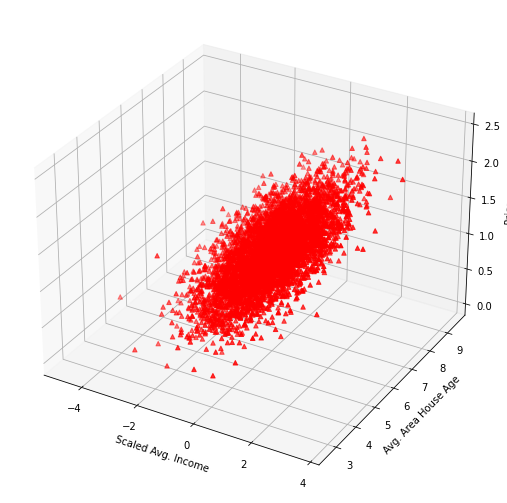

In [26]:
# Considering a set of Scaled Avg. Income, Avg. House Age, and Price as z axis
x_axis_sclincome = np.array(x_scaleset['Scaled Avg. Income'])
y_axis_houseage  = np.array(x_scaleset['Avg. Area House Age'])
z_axis_price     = np.array(y_set)

# Plot the 3D
fig = plt.figure(figsize = [9, 9])
ax  = fig.add_subplot(projection='3d')       # Create the 3D projection first
ax.scatter(x_axis_sclincome, y_axis_houseage, z_axis_price, color = 'red', marker = '^')

ax.set_xlabel('Scaled Avg. Income')
ax.set_ylabel('Avg. Area House Age')
ax.set_zlabel('Price')
plt.show()

**Dataset - Predictions Visualization**

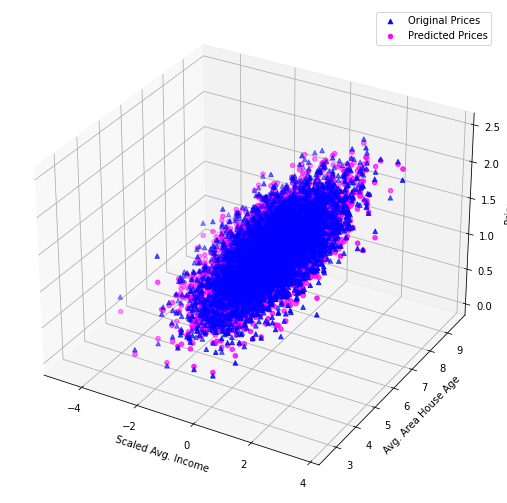

In [27]:
# Firstly, a set of predictions must be created - based on the whole set of x
y_pred = housing_linear.predict(x_scaleset)

# Plot the 3D
fig = plt.figure(figsize = [9, 9])
ax  = fig.add_subplot(projection='3d')       # Create the 3D projection first
ax.scatter(x_axis_sclincome, y_axis_houseage, z_axis_price, color = 'blue', marker = '^', )  # Plotting with z axis of the original prices
ax.scatter(x_axis_sclincome, y_axis_houseage, y_pred, color = 'magenta', marker = 'o')       # Plotting with z axis of the predicted prices

ax.set_xlabel('Scaled Avg. Income')
ax.set_ylabel('Avg. Area House Age')
ax.set_zlabel('Price')
plt.legend(['Original Prices', 'Predicted Prices'])
plt.show()

**COMMENT 8:**\
The 3D plot shows the predictions and the original prices. Their point-cloud are quite close in shape, the more pink we see, the more errors the model makes.

**SMALL QUESTION: WHAT ABOUT CREATING MODELS BASED ON EVERY SINGLE ATTRIBUTE?**

**SECTION 05: MODELS THAT TRAINED ON EACH ATTRIBUTE**

In [62]:
# Create the 'x set' of each attribute
x_set_population = pd.DataFrame(housing_notext['Area Population'])
x_set_income     = pd.DataFrame(housing_notext['Avg. Area Income'])
x_set_houseage   = pd.DataFrame(housing_notext['Avg. Area House Age'])
x_set_numofroom  = pd.DataFrame(housing_notext['Avg. Area Number of Rooms'])
x_set_numbedroom = pd.DataFrame(housing_notext['Avg. Area Number of Bedrooms'])

In [29]:
####### FUNCTION: CREATE A LINEAR MODEL AND TRAIN WITH ONLY 1 ATTRIBUTE #######
## Parameters: 1. The set of x: set_x (DataFrame)
##             2. The set of y: set_y
##             3. The label of x axis: xlabel
##             4. The label of y axis: ylabel
## Outputs: Evaluation scores: train_score, test_score

def linearModel(set_x, set_y, xlabel, ylabel):

  # Split train-test list before training
  setx_train, setx_test, sety_train, sety_test = train_test_split(set_x, set_y, test_size=0.2, random_state = 0)

  # Create model and train it
  linearmodel = linear_model.LinearRegression()
  linearmodel.fit(setx_train, sety_train)

  # Evaluation
  train_score = linearmodel.score(setx_train, sety_train)
  test_score  = linearmodel.score(setx_test, sety_test)

  # Make predictions based on input
  setx_gen  = np.linspace(np.amin(set_x), np.amax(set_x), 100)   # Generate 100 instances based on x set's min and max value
  sety_pred = linearmodel.predict(setx_gen)

  # Plot the original data and predicted one
  x_org_plot = np.array(set_x)
  y_org_plot = np.array(set_y)
  
  plt.scatter(x_org_plot, y_org_plot)
  plt.plot(setx_gen.reshape(-1, 1), np.array(sety_pred).reshape(-1, 1), color='magenta')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

  # Return values
  return train_score, test_score

**Avg. Area Population - Price**

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


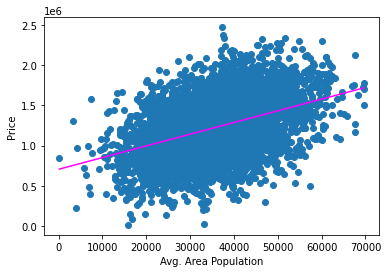

Train Score: 0.16490823184722114
Test Score: 0.17500136139668954


In [30]:
# The relation between the area population and house prices
population_train_scr, population_test_scr = linearModel(x_set_population, y_set, 'Avg. Area Population', 'Price')
print("Train Score:", population_train_scr)
print("Test Score:", population_test_scr)

**Avg. Area Income - Price**

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


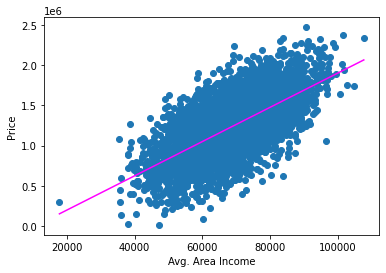

Train Score: 0.4113955485929107
Test Score: 0.40060598064566877


In [31]:
# The relation between the avg. area income and house prices
income_train_scr, income_test_scr = linearModel(x_set_income, y_set, 'Avg. Area Income', 'Price')
print("Train Score:", income_train_scr)
print("Test Score:", income_test_scr)

**Avg. Area House Age - Price**

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


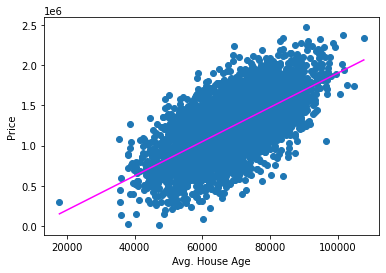

Train Score: 0.4113955485929107
Test Score: 0.40060598064566877


In [32]:
# The relation between the avg. house age and house prices
age_train_scr, age_test_scr = linearModel(x_set_income, y_set, 'Avg. House Age', 'Price')
print("Train Score:", age_train_scr)
print("Test Score:", age_test_scr)

**HMMM, WHAT LOW ACCURACIES THEY MADE INDIVIDUALLY**\
The blocks above have shown very low accuracies of each model that trained with each individual attribute. How bad they are!

**COMMENT 9:**\
There are still such many ways we can get deeper in this topic, but let's just consider some more of them, not all. The comming up blocks will show some high order housing price predictor

**SECTION 06: HIGH ORDER PREDICTING MODELS**

Due to the complexity in combining high order terms of different attributes, I will work on only each individual respecting to the house prices.

In [83]:
####### HIGH ORDER MODEL CREATING FUNCTION #######
## Parameters:
##            1. 1st order form of the attribute: attr_1st_ord  - Type: DataFrame
##            2. The target of predictions:       the_target    - Type: DataFrame
##            3. The target order:                highest_order - Type: int
## Output:
##            1. List of models' intercepts:     high_intercept_lst
##            2. List of models' coefficients:   high_coeff_lst
##            3. List of models' training score: trainscore_lst
##            4. List of models' test score:     testscore_lst
##            5. The model trained with highest order: poly_model

def highOrderModel(attr_1st_ord, attr_name, the_target, highest_order):

  # Define basic parameters of function
  highest_ord = highest_order    # The highest model's order
  start_order = 3                # The beginning model's order
  order = start_order

  # High order polynomial
  poly_model = linear_model.LinearRegression()  # Create the model

  # Preparing dataset
  x_lst  = [attr_1st_ord[attr_name], attr_1st_ord[attr_name]**2]      # List of high order terms of attribute
  y_high = the_target

  # Define lists to store each order models attributes
  high_intercept_lst = []    # The intercepts
  high_coeff_lst = []        # The coefficients
  trainscore_lst = []        # The score of accuracy - Training set
  testscore_lst  = []        # The score of accuracy - Test set

  # Number of elements = highest order - 3
  while order <= highest_ord:

    # Add into the x list with the corresponding order of the model
    x_lst.append(attr_1st_ord[attr_name]**order)   

    # Define a DataFrame of x to handle
    x_high = pd.DataFrame(x_lst).T

    # Separate train/test sets
    X_train, X_test, Y_train, Y_test = train_test_split(x_high, y_high, test_size=0.2, random_state = 0)

    # Finally, train the high order model
    poly_model.fit(X_train, Y_train)

    # Store model information
    high_intercept_lst.append(poly_model.intercept_)   # Store model's intercepts
    high_coeff_lst.append(poly_model.coef_)            # Store model's coefficients
    
    # Evaluate scores of models
    trainscore_lst.append(poly_model.score(X_train, Y_train)) # Store high order models' scores
    testscore_lst.append(poly_model.score(X_test, Y_test))    # Store high order models' scores

    # Update the order
    order = order + 1

  # Return processed values from high order models
  return high_intercept_lst, high_coeff_lst, trainscore_lst, testscore_lst, poly_model

In [45]:
# Define lists to store data from function
intercept_list = []   # List of intercepts
coeff_list  = []      # List of coefficients
train_score = []      # List of train score
test_score  = []      # List of test score
trained_poly_model = linear_model.LinearRegression()

**THE HIGH ORDER MODEL PREDICTING HOUSING PRICES BASED ON AVG. INCOMES**

In [159]:
######## FUNCTION MAKES PLOT OF PREDICTIONS ########
## Parameters:
##            1. Set of X
##            2. Set of Y
##            3. X & Y axis labels
## Output:
##            1. Plot of predictions and original value

def plotMaker(set_x, set_y, xlabel, ylabel, linearmodel, highest_ord):

  # Make predictions based on input
  setx_arr           = np.array(set_x)
  setx_gen           = np.linspace(np.amin(setx_arr), np.amax(setx_arr), 100).reshape(-1, 1)   # Generate 100 instances based on x set's min and max value
  setx_highorder_lst = np.array([setx_gen, setx_gen**2]).reshape(-1, 2)
  order = 3
  
  while order <= highest_ord:
    setx_highorder_lst = np.column_stack((setx_highorder_lst, setx_gen**order))
    order = order+1; # Update order

  setx_highorder_lst = setx_highorder_lst.reshape(-1, highest_ord)
  # Creat x instances and make predictions
  setx_data = pd.DataFrame(setx_highorder_lst)   # Turn to DataFrame
  sety_pred = linearmodel.predict(setx_data)

  # Plot the original data and predicted one
  x_org_plot = np.array(set_x)
  y_org_plot = np.array(set_y)

  plt.scatter(x_org_plot, y_org_plot)
  plt.plot(setx_gen.reshape(-1, 1), np.array(sety_pred).reshape(-1, 1), color='magenta')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

In [184]:
intercept_list, coeff_list, train_score, test_score, trained_poly_model = highOrderModel(x_set_income, 'Avg. Area Income', y_set, 6)   # Hmm a 10th order polynomial

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


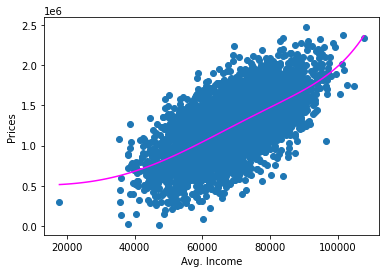

In [185]:
plotMaker(x_set_income, y_set, 'Avg. Income', 'Prices', trained_poly_model, 6)

In [186]:
# The highest order training score
train_score[6-3]

0.4117370143410426

**THE LAST COMMENT:**\
Hmmm, even the high order models for each individual attribute don't help us out, thus, I believe it would be better when using all 5 categories to make prediction for the prices\
PS: The above two functions can run the order whatever you want, just type in, but remember not to input too high, the system can't handle it.